## DUE DATE: Thursday, July 12, 2018

# Logistic Regression 

## 1. Import the Libraries:
1. numpy
2. matplotlib.pyplot
3. pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Read the csv file: "data.csv"

In [2]:
df = pd.read_csv("data.csv")

## 3. Show a sample of the data (first 10 rows)

In [3]:
df.head(10)

,x1,x2,x3,x4,y
0,-3,-2,-3,-2,1
1,-4,-3,-2,0,1
2,3,-5,-5,2,2
3,-2,3,-2,-4,1
4,-4,-1,1,4,0
5,2,-5,-5,-5,2
6,0,4,0,0,1
7,0,-4,-2,-1,2
8,4,1,-2,-4,2
9,2,-5,-1,0,2


## 4. Show some statistics about the data

In [4]:
df.describe()

,x1,x2,x3,x4,y
count,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000
mean,-0.637516,-0.394804,-1.198352,-0.004436,0.962611
std,3.154112,2.922269,1.944199,2.970257,0.799807
min,-5.000000,-5.000000,-5.000000,-5.000000,0.000000
25%,-4.000000,-3.000000,-3.000000,-3.000000,0.000000
50%,-1.000000,0.000000,-1.000000,0.000000,1.000000
75%,2.000000,2.000000,0.000000,3.000000,2.000000
max,4.000000,4.000000,3.000000,4.000000,2.000000


## 5. Show info about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578 entries, 0 to 1577
Data columns (total 5 columns):
x1    1578 non-null int64
x2    1578 non-null int64
x3    1578 non-null int64
x4    1578 non-null int64
y     1578 non-null int64
dtypes: int64(5)
memory usage: 61.7 KB


## 6. Refer to the features data by "X", and refer to the label feature (y) by "y" 

In [6]:
X = df[['x1','x2','x3','x4']]
y = df['y']

## 7. Load the train_test_split function

In [7]:
from sklearn.model_selection import train_test_split

## 8. Split the data into:
1. a **training** data set, and
2. a **test** data set. 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=49)

In [9]:
y_test.shape

(395,)

## 9. Impleminting Logistic Regression from sklearn.linear_model and using OneVsRestClassifier

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

## 10. Fit the model to the training data

In [11]:
ovrc = OneVsRestClassifier(LinearSVC(random_state=0))
ovrc.fit(X_train, y_train)


OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)

## 11. Print the linear model's intercept and coefficients

In [12]:
print("Intercept:", ovrc.intercept_)
print('Coefficient', ovrc.coef_)

Intercept: [[-2.09734113]
 [-0.98844793]
 [-2.21096742]]
Coefficient [[ 0.41296352 -0.38068076  0.97506271  1.44338523]
 [-0.28073934  0.18426514 -0.25688032  0.05818696]
 [ 0.63560088 -0.18418184 -0.31982664 -0.79184281]]


## 12. Use the trained model to predict the test data set

In [13]:
predict = ovrc.predict(X_test)

## 13. Create a scatterplot of the real test values versus the predicted values.

Text(0,0.5,'Predicted Y')

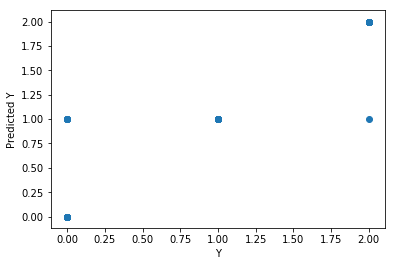

In [14]:
plt.scatter(y_test, predict)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

## 14. Using Scikit-Learn Metrics Library:

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
recall_score, classification_report, confusion_matrix

print('Accuracy:', accuracy_score(y_test, predict))
print('Classification Report:\n', classification_report(y_test, predict))
print('Confusion Matrix:\n', confusion_matrix(y_test, predict))

score = ovrc.score(X_test, y_test)
print('Score:\n',score) 


Accuracy: 0.982278481013
Classification Report:
              precision    recall  f1-score   support

          0       1.00      0.96      0.98       139
          1       0.95      1.00      0.97       135
          2       1.00      0.99      1.00       121

avg / total       0.98      0.98      0.98       395

Confusion Matrix:
 [[133   6   0]
 [  0 135   0]
 [  0   1 120]]
Score:
 0.982278481013


## 15. The Confusion Matrix Using the Seaborn Library:

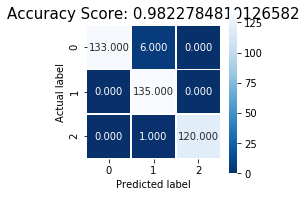

In [16]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predict)
import seaborn as sns
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()



## 16. Testing the model with train data:

#### Using Scikit-Learn Metrics Library (checking training  data):

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
recall_score, classification_report, confusion_matrix

predict = ovrc.predict(X_train)
print('Accuracy:', accuracy_score(y_train, predict))
print('Classification Report:\n', classification_report(y_train, predict))
print('Confusion Matrix:\n', confusion_matrix(y_train, predict))

score = ovrc.score(X_train, y_train)
print('Score:\n',score) 

Accuracy: 0.986475063398
Classification Report:
              precision    recall  f1-score   support

          0       0.99      0.97      0.98       396
          1       0.97      1.00      0.98       432
          2       1.00      0.99      0.99       355

avg / total       0.99      0.99      0.99      1183

Confusion Matrix:
 [[385  11   0]
 [  1 431   0]
 [  1   3 351]]
Score:
 0.986475063398


#### The Confusion Matrix Using the Seaborn Library (checking training  data):

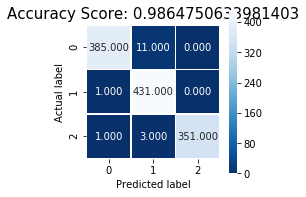

In [18]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_train, predict)
import seaborn as sns
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

## 17. Use your own Python implementation of the Logistic Regression algorithm

#### cost function:

In [19]:
def cost(X_b, y_b, W, m):
    return  -(1./m) * np.sum(
        (np.multiply(y_b, np.log(sigmoid(np.dot(W,X_b))))) +
        (np.multiply((1-y_b),np.log(1-sigmoid(np.dot(W,X_b)))))
    )


#### sigmoid function:

In [20]:
def sigmoid(x):
    return 1/(1+(np.exp(-x)))

#### Logistic Regression function:

In [35]:
def logisticRegression(X_a, y_a, alpha, iterations):
    X_b=np.c_[np.ones((len(y_a), 1)), X_a]
    y_b=np.array(y_a).reshape(1,len(y_a))
    X_b=X_b.T
    print('X_b shape =', X_b.shape)
    print('y shape =', y_b.shape)
    cost_list = []
    m = np.size(X_b, axis=1)
    W = np.random.random((1, X_b.shape[0]))
    print('W =',W.shape)
    for i in range(iterations):
        W = W - (alpha/m) * np.dot((sigmoid(np.dot(W,X_b)) - y_b), X_b.T)
        cost_ = cost(X_b, y_b, W, m)
        cost_list.append([i, cost_])
    return W, cost_list



#### Implementation for class 0:

X_b shape = (5, 1183)
y shape = (1, 1183)
W = (1, 5)
W0 = [[-2.13684308  0.64106936 -0.55945466  1.70649555  1.8417556 ]]


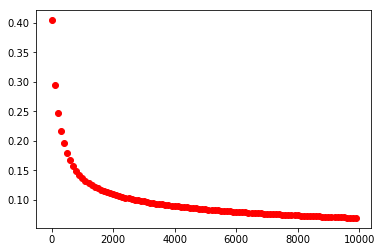

In [36]:
y0 = y_train.copy()
y0[y_train==0]=1
y0[y_train==1]=0
y0[y_train==2]=0
W0, cost_list = logisticRegression(X_train, y0, 0.01, 10000)

print('W0 =', W0)
for i in range(0, len(cost_list), 100):
    plt.plot(cost_list[i][0], cost_list[i][1], 'ro')
plt.show()


##### Accuracy for class 0:

In [23]:
X_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T
predictions = np.dot(W0,X_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y0_test = y_test.copy()
y0_test[y_test==0]=1
y0_test[y_test==1]=0
y0_test[y_test==2]=0
print("Accuracy for class 0:", sum(y0_test == predictions[0]) / X_test.shape[0] )

Accuracy for class 0: 0.979746835443038


#### Implementation for class 1:

W1 = [[-2.4761186  -0.78040686  0.49323243 -0.56052977  0.06574231]]


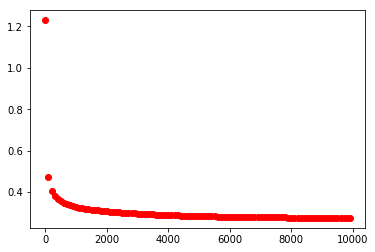

In [24]:
y1 = y_train.copy()
y1[y_train==0]=0
y1[y_train==1]=1
y1[y_train==2]=0
W1, cost_list = logisticRegression(X_train, y1, 0.01, 10000)

print('W1 =', W1)
for i in range(0, len(cost_list), 100):
    plt.plot(cost_list[i][0], cost_list[i][1], 'ro')
plt.show()

##### Accuracy for class 1:

In [25]:
X_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T
predictions = np.dot(W1,X_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y1_test = y_test.copy()
y1_test[y_test==0]=0
y1_test[y_test==1]=1
y1_test[y_test==2]=0
print("Accuracy for class 1:", sum(y1_test == predictions[0]) / X_test.shape[0] )

Accuracy for class 1: 0.9265822784810127


#### Implementation for class 2:

W2 = [[-2.74821097  0.95227915 -0.39961999  0.04687231 -1.64313149]]


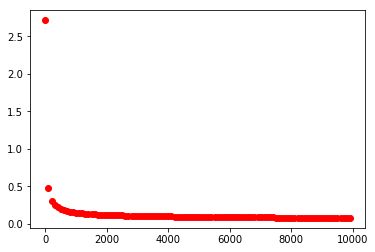

In [26]:
y2 = y_train.copy()
y2[y_train==0]=0
y2[y_train==1]=0
y2[y_train==2]=1
W2, cost_list = logisticRegression(X_train, y2, 0.01, 10000)

print('W2 =', W2)
for i in range(0, len(cost_list), 100):
    plt.plot(cost_list[i][0], cost_list[i][1], 'ro')
plt.show()

##### Accuracy for class 2:

In [27]:
X_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T
predictions = np.dot(W2,X_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y2_test = y_test.copy()
y2_test[y_test==0]=0
y2_test[y_test==1]=0
y2_test[y_test==2]=1
print("Accuracy for class 2:", sum(y2_test == predictions[0]) / X_test.shape[0] )

Accuracy for class 2: 0.9696202531645569


### create a prediction function to choose between the 3 classes:

In [28]:
def distance(W, X):
    numerator = np.dot(W, X)
    denominator = np.sqrt(np.dot(W, W.T))
    return np.divide(numerator,denominator)


##### Checking the error with the train data:

In [29]:
X_b=np.c_[np.ones((X_train.shape[0], 1)), X_train].T
dist=np.r_[distance(W0, X_b),distance(W1, X_b),distance(W2, X_b)]
prediction=np.argmax(dist,0)

print("Accuracy in compare to the train data:", sum(y_train == prediction) / X_train.shape[0] )

Accuracy in compare to the train data: 0.9687235841081995


In [32]:
print(prediction.shape)
print(y_train.shape)

(1183,)
(1183,)


In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
recall_score, classification_report, confusion_matrix

print('Accuracy:', accuracy_score(y_train, prediction))
print('Classification Report:\n', classification_report(y_train, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_train, prediction))


Accuracy: 0.9687235841081995
Classification Report:
              precision    recall  f1-score   support

          0       0.98      0.96      0.97       396
          1       0.94      0.98      0.96       432
          2       1.00      0.97      0.98       355

avg / total       0.97      0.97      0.97      1183

Confusion Matrix:
 [[379  17   0]
 [  7 424   1]
 [  1  11 343]]


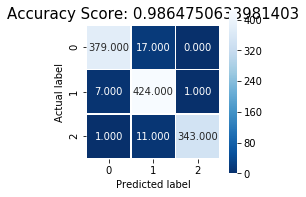

In [31]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_train, prediction)
import seaborn as sns
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

##### Checking the error with the test data:

In [32]:
X_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T

X_predict0 = np.dot(W0, X_b)
X_predict1 = np.dot(W1, X_b)
X_predict2 = np.dot(W2, X_b)
X_predict0[X_predict0 < 0] = 0
X_predict0[X_predict0 >0] = 1
X_predict1[X_predict1 < 0] = 0
X_predict1[X_predict1 >0] = 1
X_predict2[X_predict2 < 0] = 0
X_predict2[X_predict2 >0] = 1
p=np.r_[X_predict0,X_predict1,X_predict2]

dist=np.r_[distance(W0, X_b),distance(W1, X_b),distance(W2, X_b)]
prediction=np.argmax(dist,0)

print("Accuracy in compare to the test data:", sum(y_test == prediction) / X_test.shape[0] )

Accuracy in compare to the test data: 0.9772151898734177


In [33]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
recall_score, classification_report, confusion_matrix

print('Accuracy:', accuracy_score(y_test, prediction))
print('Classification Report:\n', classification_report(y_test, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))

Accuracy: 0.9772151898734177
Classification Report:
              precision    recall  f1-score   support

          0       0.99      0.96      0.97       139
          1       0.95      0.99      0.97       135
          2       0.99      0.99      0.99       121

avg / total       0.98      0.98      0.98       395

Confusion Matrix:
 [[133   6   0]
 [  1 133   1]
 [  0   1 120]]


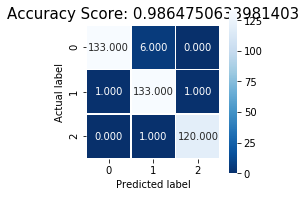

In [34]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, prediction)
import seaborn as sns
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()